<a href="https://colab.research.google.com/github/Fadelmuhammad013/Machine-learning/blob/main/01.%20Week%201/Regresion%20Automobile/Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.6 MB/s eta 0:00:00


In [2]:
from google.colab import files

uploaded = files.upload()  # Ini akan meminta Anda mengunggah file

# Membaca dataset
df = pd.read_csv("Automobile.csv")

# Menampilkan beberapa baris pertama
df.head()


Saving Automobile.csv to Automobile.csv


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [4]:
# Mengisi nilai yang hilang dengan median
for col in ["price", "peak-rpm", "horsepower", "stroke", "bore", "num-of-doors", "normalized-losses"]:
    df[col] = df[col].fillna(df[col].median())

# Pisahkan fitur dan target
X = df.drop(columns=["symboling"])  # Fitur
y = df["symboling"]  # Target

# Pisahkan fitur numerik dan kategorikal
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Buat pipeline preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Pipeline dengan model Linear Regression
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)


In [7]:
!pip install --upgrade scikit-learn

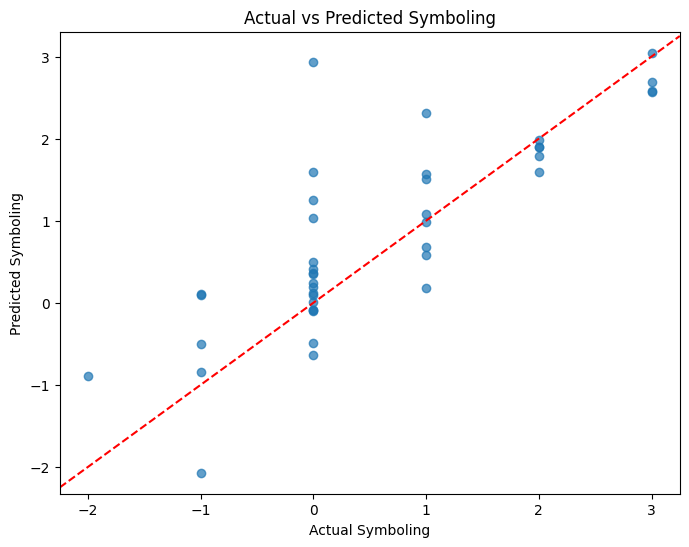

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Garis ideal
plt.show()


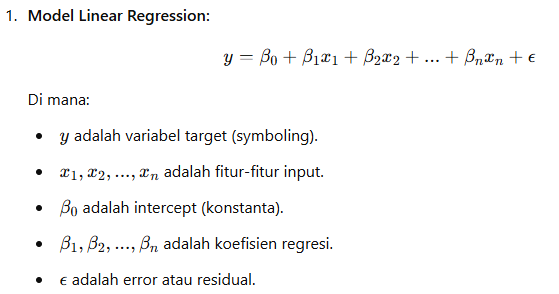

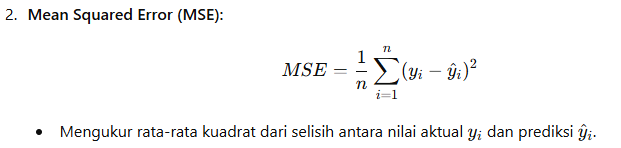

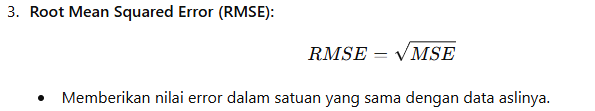

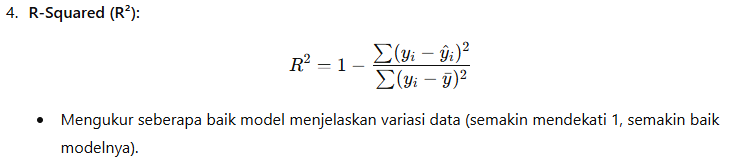

Nilai R² = 0.4768 menunjukkan bahwa sekitar 47.68% variasi dalam symboling dapat dijelaskan oleh fitur-fitur yang digunakan. Model masih bisa ditingkatkan dengan memilih fitur yang lebih relevan atau mencoba metode lain seperti regresi polinomial atau algoritma non-linear.